<h1 style="color : brown ; text-align: center; ">Python for Data Science Project (Coded) : Haraprasad Dhal</h1>
<hr style="height:2px;border-width:0;color:gray;background-color:gray">

<h2 style="color:blue">Context:</h2>
<p>
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign. They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience.
</p>

<h3 style="color:blue">Required Libraries</h3>

In [1]:
# libraries for data manipulation
import numpy as np
import pandas as pd

# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="color:blue">Description of Data</h3>

In [2]:
# import data from csv file
data = pd.read_csv("austo_automobile.csv")
# let's print first few rows
data.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


<p style="color:blue"><b>Data fields:</b></p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


<p><b>The Data set has 14 columns. There are total 1581 records.</b></p><br>
Numerical Columns : Age, No_of_Dependants, salary, partner_salary, Total_salary, price. It is better to make all salary fields of same data type since Total salary should be equals to salary + partner_salary. <br>
Categorical Columns : Gender, Prfession, Marital Status, Education, Personal loan, House Loan, Partner Working, make.

<p><b>Categorical Variables</b></p>

In [4]:
data['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [5]:
data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [6]:
data['Gender'].isnull().sum()

53

The Gender column has 53 Null/missing values that needs attention. We observe that gender is categorised either 'Male' or 'Female'. However there are two typos 'Femal' and 'Femle' that needs to be fixed.

In [7]:
data['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

In [8]:
data['Profession'].value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In the provided data set we have two kinds of profession in which people are occupied. Business and Salaried. 

In [9]:
data['Marital_status'].value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [10]:
data['Education'].value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

All the records in our dataset have heigher education qualifications. Graduate or Postgraduate. 

In [11]:
print('Personal Loan:-')
print(data['Personal_loan'].value_counts(),'\n')
print('House Loan:-')
print(data['House_loan'].value_counts())

Personal Loan:-
Yes    792
No     789
Name: Personal_loan, dtype: int64 

House Loan:-
No     1054
Yes     527
Name: House_loan, dtype: int64


Loan variables are binary YES or NO 

In [12]:
data['Make'].value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

<p>We have three kinds of veichle manufacture type here. Let's just get to know them in some detail so that it may be useful during the analysis to figure out customer preferences.</p>
<ol>
    <li>Sedan : A sedan is defined as a 4-door passenger car with a trunk that is separate from the passengers with a three-box body: the engine, the area for passengers, and the trunk. Capacity is upto 5 passengers. Sedan is preffered in terms of Luxury, Performsnce and saftey.</li>
    <li>Hatchback : There's no separation between the trunk and the car's interior, hatchbacks have more storage space than sedans. You can fit larger items into the trunk of a hatchback, and the rear seats fold down, giving you even more room for cargo.</li>
    <li>SUV : SUVs are larger vehicles built on a truck's chassis, offering greater height, ground clearance, and cargo space. They are designed to offer better off-road performance, better visibility and also work well for families and when carrying extra-large or heavy goods.</li>
</ol>

<p><b>Numerical Variables:</b></p>

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


The above cell shows a general statistical description of all the numerical variables. We will discuss more on these after we 
complete the data cleaning.

<p style="color:blue"><b>Missing Value Diagnosis:</b></p>

In [14]:
# check count of missing values
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

We got missing values in gender and Partner salary variables. The subset which has gender category missing, it will not be possible to include it in analysis which involves gender variable. The subset which has partner salary missing, it's Total salary variable is also not correct. We need to account for these records.

If we consider removing these records, atmost we have to remove 53 + 106 = 159 records. Lets check if these two subsets have any overlaps or patterns.

In [15]:
data.loc[(data['Gender'].isnull()==True),'Partner_salary'].isnull().sum()

3

Only three records have both gender and partner salary variables missing.

In [16]:
# lets look at these subsets of data in more detail.
# gender missing subset 
data.loc[data['Gender'].isnull()==True].head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
24,46,NaN,Business,Married,Post Graduate,3,Yes,No,Yes,78000,600.0,78600,50000,SUV
25,46,NaN,Salaried,Married,Post Graduate,3,No,No,Yes,87900,700.0,88600,50000,SUV
67,53,NaN,Salaried,Married,Graduate,4,Yes,No,Yes,80900,30000.0,110900,49000,SUV
125,47,NaN,Salaried,Single,Post Graduate,2,Yes,No,No,87200,0.0,87200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.0,68600,50000,SUV


Most of the education is postgraduate.

Since we have no solid basis to replace this missing gender records with some value. We will drop these 53 records.


In [17]:
data.loc[data['Gender'].isnull()==True,['Education']].value_counts()

Education    
Post Graduate    34
Graduate         19
dtype: int64

In [18]:
# Partner salary missing subset
data.loc[data['Partner_salary'].isnull()==True].head(10)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
115,48,Female,Salaried,Married,Post Graduate,3,No,No,No,78000,NaN,78000,59000,SUV
163,45,Male,Salaried,Married,Post Graduate,1,Yes,Yes,No,71300,NaN,71300,42000,Sedan
164,45,Male,Business,Married,Graduate,1,Yes,No,No,56700,NaN,56700,54000,Sedan
165,45,Male,Salaried,Married,Graduate,2,No,No,No,55100,NaN,55100,65000,SUV
205,44,Male,Salaried,Married,Graduate,2,No,Yes,No,57100,NaN,57100,51000,Sedan


In [19]:
data.loc[data['Partner_salary'].isnull()==True,['Partner_working']].value_counts()

Partner_working
No                 90
Yes                16
dtype: int64

<b>From the above cell we can observe that out of 106 missing partner salary records, 90 have partner not working status. For those 
records we can replace the nan values in partner salary with zero.</b>

In [20]:
data.loc[data['Partner_working']=='No',['Partner_salary']].value_counts(dropna=False)

Partner_salary
0.0               623
NaN                90
dtype: int64

We see that 623 records with Partner_working='No', Partner_salary is zero. So It is safe to perform above mentioned diagnosis.

In [21]:
data.loc[data['Partner_working']=='No',['Partner_salary']]=0
data.loc[data['Partner_salary'].isnull()==True,['Partner_working']].value_counts()

Partner_working
Yes                16
dtype: int64

All the 90 records with Partner working status = No has been replaced with Partner_salary=0.

In [22]:
data.loc[data['Partner_working']=='No',['Partner_salary']].value_counts(dropna=False)

Partner_salary
0.0               713
dtype: int64

In [23]:
# Now we will drop the remaining records where Partner_working is Yes but Partner_salry is missing and 
# the records where gender is missing .
data.dropna(axis=0,how='any',inplace=True)
# Reset the index
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [24]:
data['Partner_salary']=data['Partner_salary'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1512 non-null   int64 
 1   Gender            1512 non-null   object
 2   Profession        1512 non-null   object
 3   Marital_status    1512 non-null   object
 4   Education         1512 non-null   object
 5   No_of_Dependents  1512 non-null   int64 
 6   Personal_loan     1512 non-null   object
 7   House_loan        1512 non-null   object
 8   Partner_working   1512 non-null   object
 9   Salary            1512 non-null   int64 
 10  Partner_salary    1512 non-null   int64 
 11  Total_salary      1512 non-null   int64 
 12  Price             1512 non-null   int64 
 13  Make              1512 non-null   object
dtypes: int64(6), object(8)
memory usage: 165.5+ KB


Missing value diagnosis is complete. Now lets check if there are any irregularities in data.

<p style="color:blue"><b>Irregularities diagnosis</b></p>

<b>Statistical summary:</b>

In [25]:
# we will work with a copy of original data from here on.
df=data.copy()
df.head(5)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200,139900,57000,SUV


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1512.0,31.954365,8.413607,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1512.0,2.445106,0.945029,0.0,2.0,2.0,3.0,4.0
Salary,1512.0,60413.425926,14615.150328,30000.0,51900.0,59500.0,71825.0,99300.0
Partner_salary,1512.0,19341.997354,19671.649506,0.0,0.0,25200.0,38200.0,80500.0
Total_salary,1512.0,79755.423280,25442.673205,30600.0,60800.0,78100.0,95900.0,171000.0
Price,1512.0,35951.058201,13498.103362,18000.0,25000.0,32000.0,47000.0,70000.0


<ul>
    <li>Age ranges from 22 to 54. With 75% of the buyers less than or equal to age 38. Older people in their 50s are less likely to buy a car.</li>
    <li>75% of the buyer have 3 or less dependents on them.</li>
    <li>Salary ranges from 30K to 99K with a mean of 60K.</li>
    <li>Price of vehicles ranges from 18K to 70K.</li>
</ul>

For correctness of data lets check whether salary + partner_salary = Total_salary in all records.

In [27]:
(df['Total_salary']-(df['Salary']+df['Partner_salary'])!=0).sum()

0

We find that salary fields are valid in all the records.

In [28]:
df['Gender'].value_counts()

Male      1188
Female     322
Femal        1
Femle        1
Name: Gender, dtype: int64

In [29]:
df.loc[(df['Gender']=='Femal') | (df['Gender']=='Femle'),['Gender']]='Female'
df['Gender'].value_counts()

Male      1188
Female     324
Name: Gender, dtype: int64

Typos in Gender Variable that we had observed earlier is now fixed.

If a person is Single, there is no partner. In these records we should expect the Partner_working field to be No. Let's check.

In [30]:
df[df['Marital_status']=='Single']['Partner_working'].unique()

array(['No'], dtype=object)

All the values are No. The Marital staus and partner working columns don't have any descrepancy. Now let's move on to
univariate analysis where we can check for outliers.

<h3 style="color:blue">Exloratory Data Analysis</h3>
<p style="color:blue"><b>Univariate Analysis:</b></p>

<b>Age distribution<b>

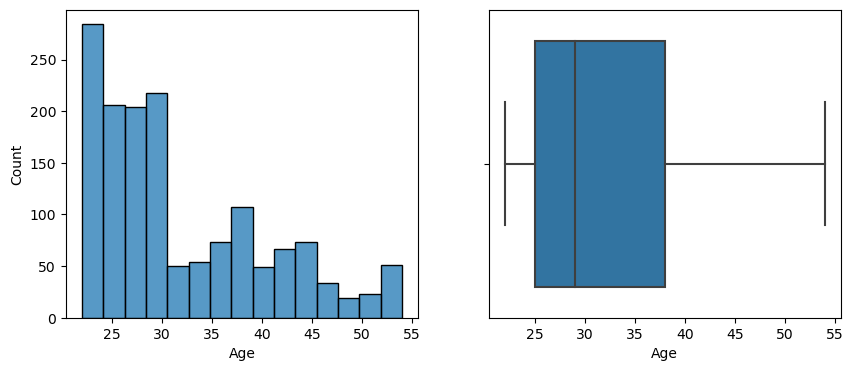

In [31]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Age')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Age')
plt.savefig('Age_dist.png',dpi=400);
plt.show();


<ul>
    <li>From the above box plot we can see that 75% of the buyers have age less than 40.</li>
    <li>Median age is around 28</li>
    <li>There is no one above 55 as this is a very old age for most people and many start to loose the ability to drive. </li>
</ul>


<b>Salary Distribution</b>

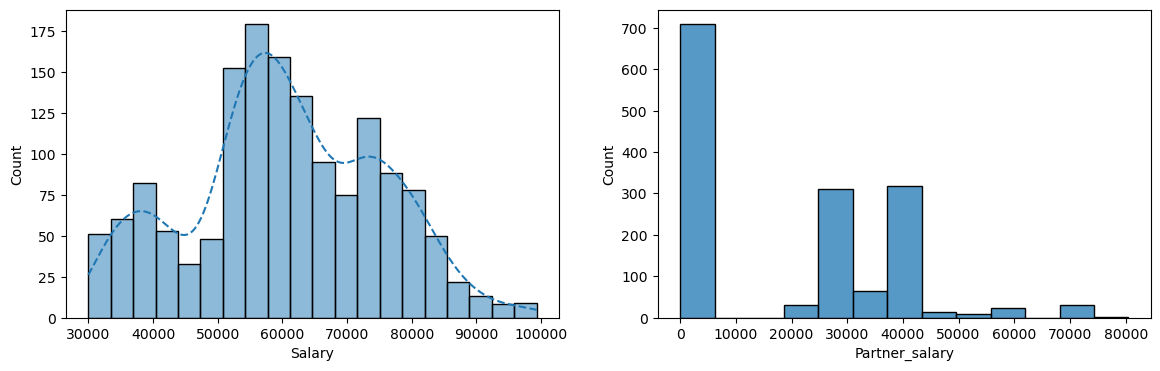

In [32]:
# salary distribution histograms
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Salary',kde=True,line_kws={'linestyle':'dashed'})
plt.subplot(1,2,2)
sns.histplot(data=df,x='Partner_salary')
# plt.savefig('salary_dist_hist.png',dpi=400)
plt.show()

In [33]:
df[['Salary','Partner_salary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,1512.0,60413.425926,14615.150328,30000.0,51900.0,59500.0,71825.0,99300.0
Partner_salary,1512.0,19341.997354,19671.649506,0.0,0.0,25200.0,38200.0,80500.0


<ul>
    <li>Mean salary of buyers is around 60K and maximum reaching up to 99K. 75% have salary less than 72K.</li>
    <li>Mean salary of partner's salary is around 19k. 25% of partner are not working. If we take that into account and calculate for records where partner is working, the mean value will take a higher value. Let's check.</li>
</ul>

In [34]:
# Lets check among working partners
df[df['Partner_working']=='Yes'][['Partner_salary']].describe().T

,count,mean,std,min,25%,50%,75%,max
Partner_salary,822.0,35577.980535,11569.545655,100.0,28600.0,35350.0,40400.0,80500.0


There are 822 working partner records. Among Working partner the mean salary is around 35K and maximum reaching up to 80K. 75% have salary less than 41k.

<b>Price distribution</b>

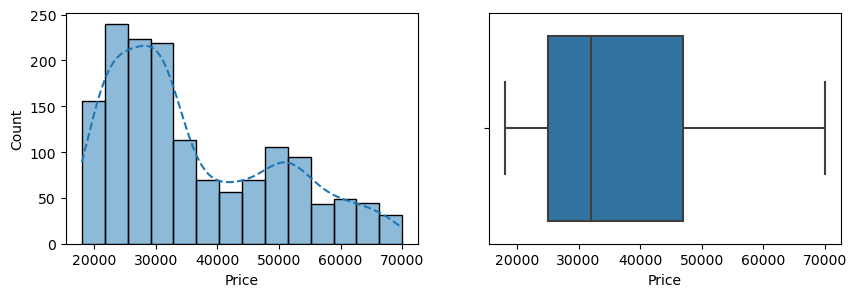

In [35]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Price',kde=True,line_kws={'linestyle':'dashed'})
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Price')
plt.show()

In [36]:
df[['Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1512.0,35951.058201,13498.103362,18000.0,25000.0,32000.0,47000.0,70000.0


<b>Gender Distribution</b>

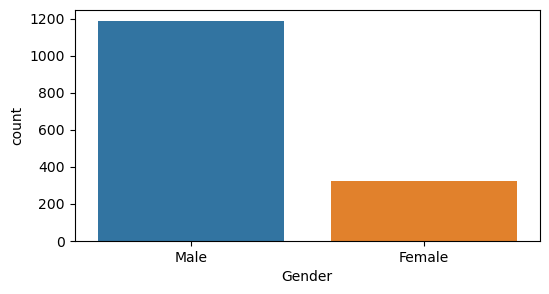

In [37]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='Gender')
plt.show()

<b>Veichle Manufacture Type</b>

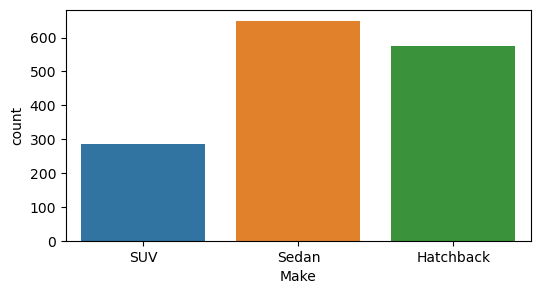

In [38]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='Make')
plt.show()

<b>No of Dependants</b>

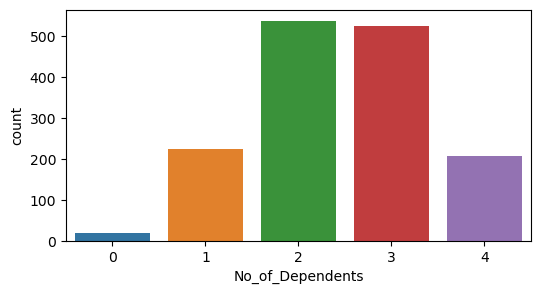

In [39]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='No_of_Dependents')
plt.show()

<p style="color:blue"><b>Bivariate and Multivariate Analysis:</b></p>

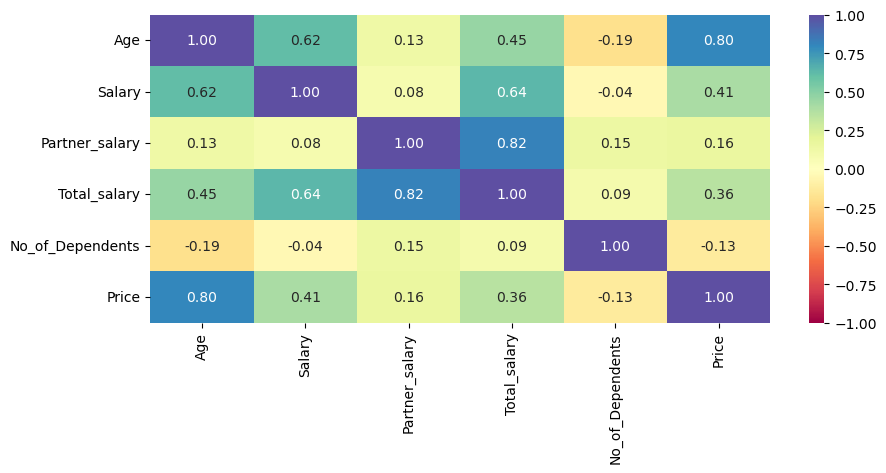

In [40]:
#correlation among numerical variables
num_var = ['Age','Salary','Partner_salary','Total_salary','No_of_Dependents','Price']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(10, 4))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<b>Pair plot between Numerical variables</b>

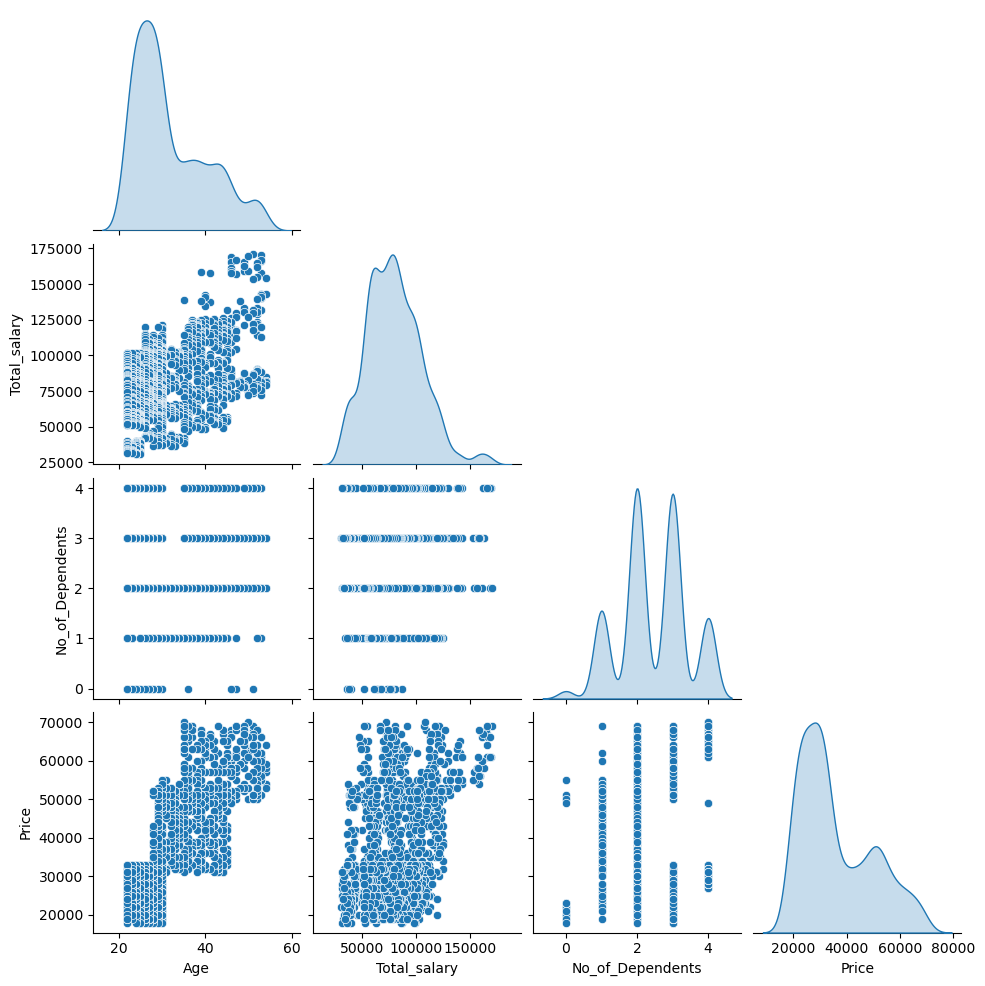

In [62]:
sns.pairplot(data=df[['Age','Total_salary','No_of_Dependents','Price']], diag_kind="kde",height=2.5,corner=True)
plt.show()

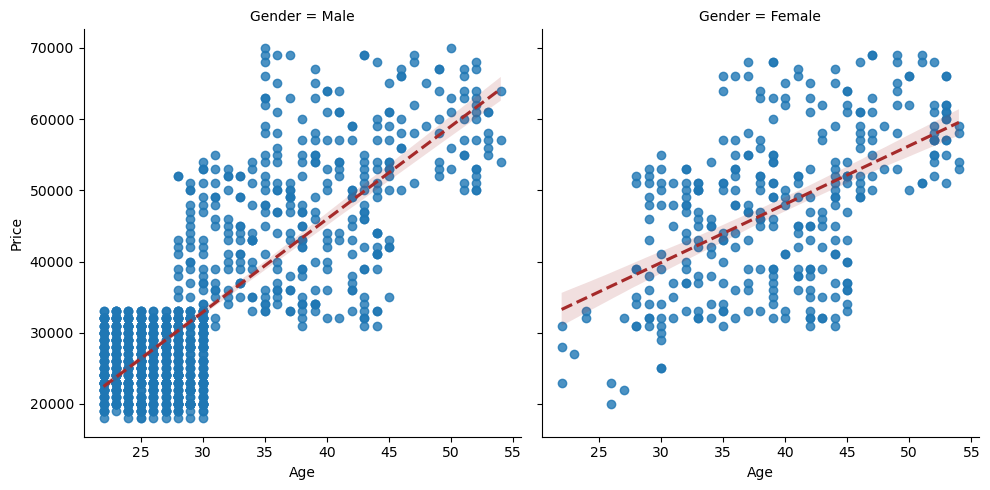

In [42]:
sns.lmplot(data=df,x='Age',y='Price',height=5,col='Gender',line_kws={'color':'brown','linestyle':'dashed'},
          scatter_kws={'marker':'.'})
# plt.savefig('Age_vs_price.png',dpi=400)
plt.show()


In [43]:

df[['Age','Price']].corr()

,Age,Price
Age,1.000000,0.797202
Price,0.797202,1.000000


<b>Customer's gender, profession and education</b>

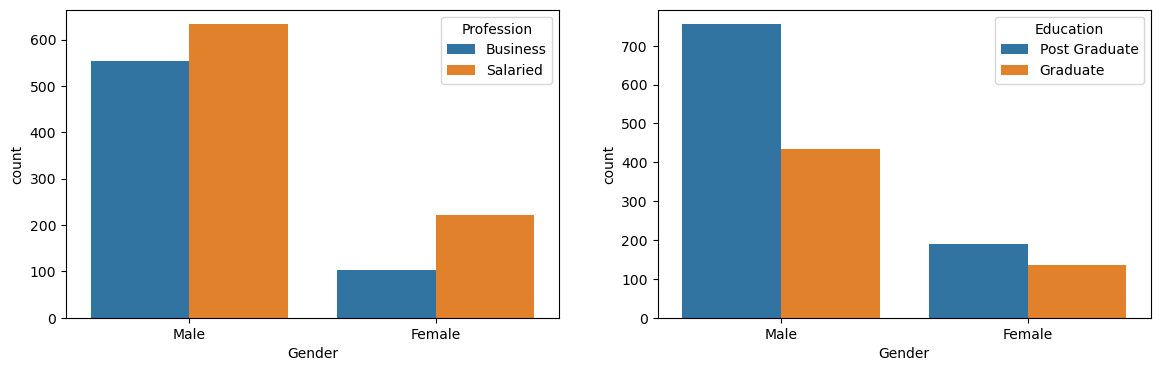

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.countplot(data=df,x='Gender',hue='Profession')
plt.subplot(122)
sns.countplot(data=df,x='Gender',hue='Education')
# plt.savefig('about_buyers.png',dpi=400)
plt.show()

<b>Price range of SUV, Sedan and Hatchbacks</b>

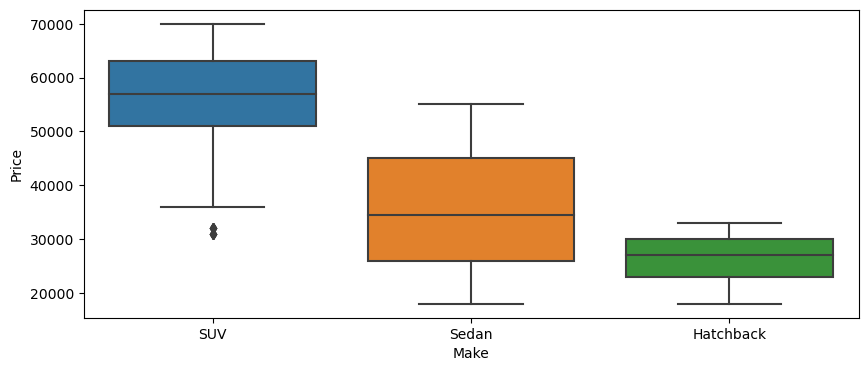

In [61]:
# make type vs price
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Make',y='Price')
plt.show()


<ul>
    <li>Hatchbacks are most affordable with a median price of around 30K.</li>
    <li>Sedan has a median price of around 34K yet it has a wide range of prices reaching up to 55k.</li>
    <li>SUVs are costliest with a median price of around 57K</li>
</ul>

<b>Lets check relation of salary to preferred car type</b>

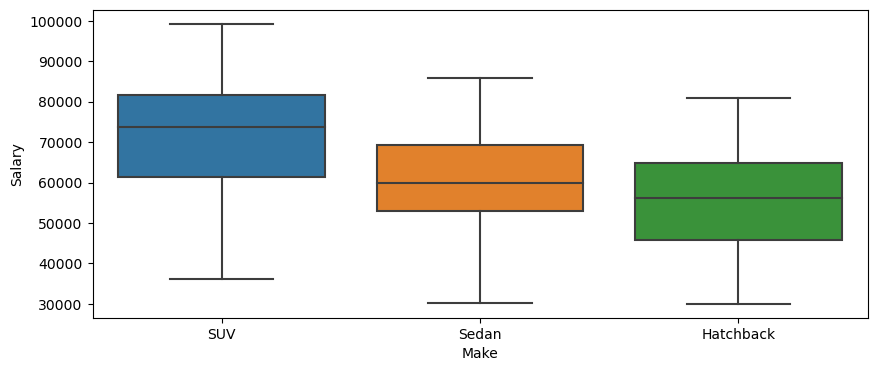

In [60]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Make',y='Salary')
plt.show()

With increasing salary the buyer is more likely to afford SUV which is costliest among the available types. 

<b>Income/salary distribution age wise</b>

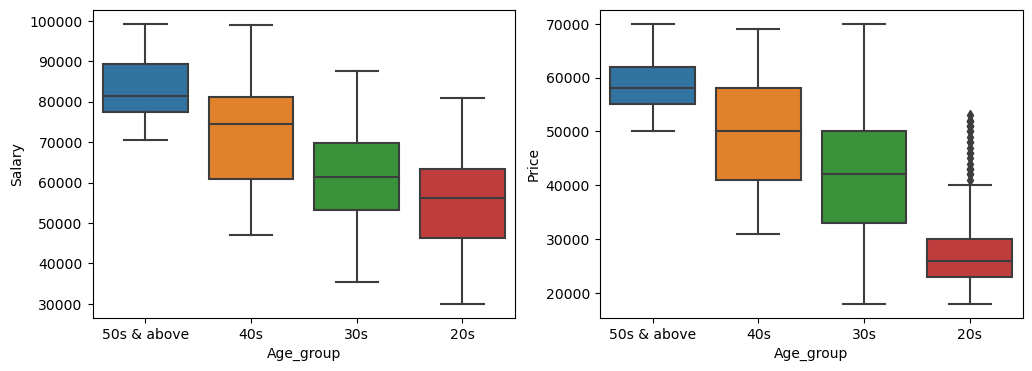

In [45]:
# age and Salary
# let's create a new column to categorise age groups 
def age_group(age):
    if (age>=20 and age<30):
        return '20s'
    if (age>=30 and age<40):
        return '30s'
    if (age>=40 and age<50):
        return '40s'
    if(age>=50):
        return '50s & above'
    
df['Age_group']=df['Age'].apply(age_group)

# now let's plot a bar chart to see how many dependents are there for different age groups
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Age_group',y='Salary')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Age_group',y='Price')
# plt.savefig('salary_vs_agegroup.png',dpi=400)
plt.show()

<b>Influence of working partner on purchase price</b>

In [46]:
# relation of partner working to price of purchased car
df['Partner_working'].value_counts()

Yes    822
No     690
Name: Partner_working, dtype: int64

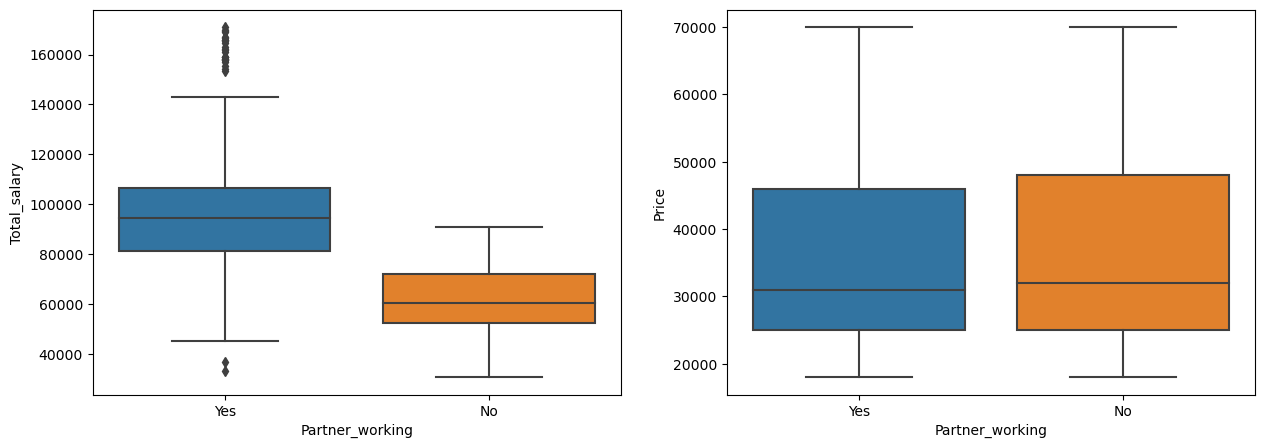

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Partner_working',y='Total_salary')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Partner_working',y='Price')
# plt.savefig('partner_working_and_price.png',dpi=400)
plt.show()

<b>Vehicle make preference across gender and profession</b>

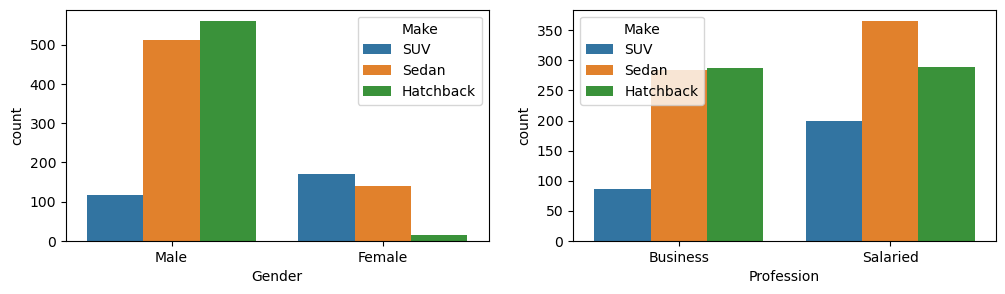

In [49]:
# make type preference by gender and profession
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Gender',hue='Make')
plt.subplot(1,2,2)
sns.countplot(data=df,x='Profession',hue='Make')
plt.show()

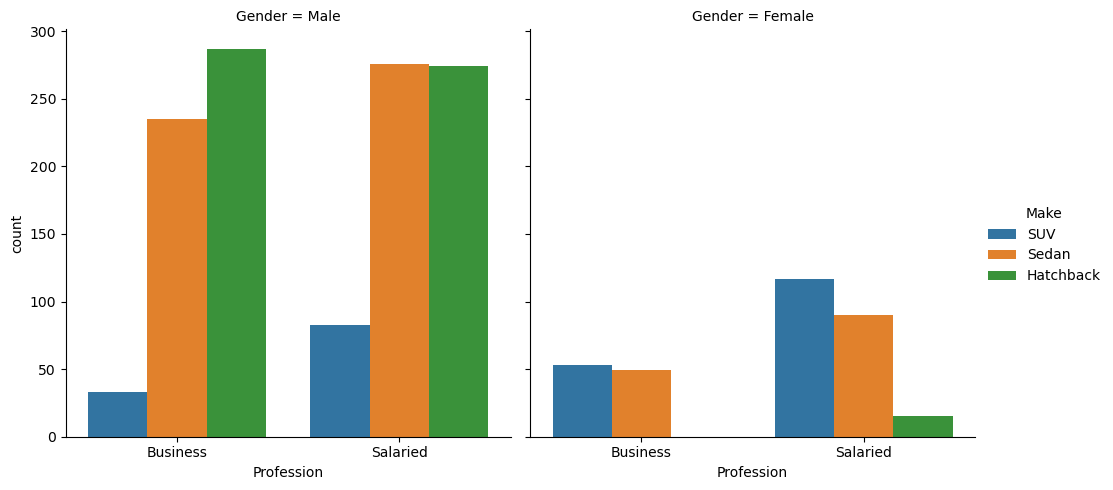

In [50]:
# Sheldon coopers claim
sns.catplot(data=df,x='Profession',hue='Make',col='Gender',kind='count')
# plt.savefig('make_gender_prof_catplot.png',dpi=400)
plt.show()

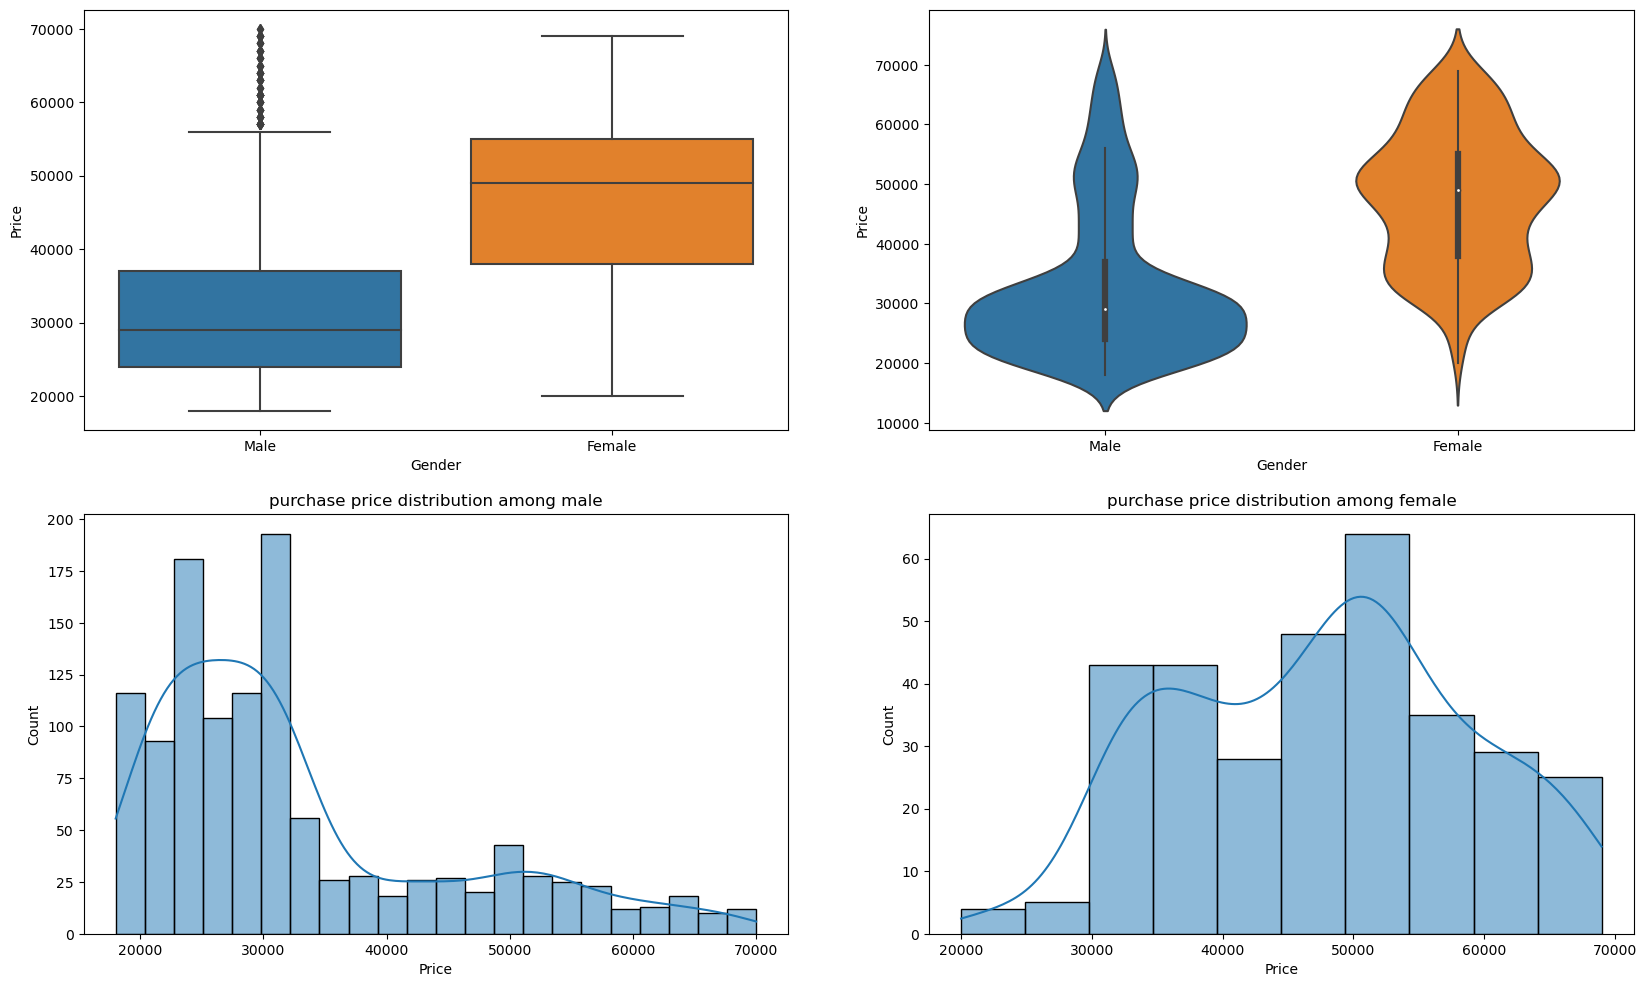

In [51]:
## purchase distribution among male and female buyers
plt.figure(figsize=(20,12))
plt.subplot(221)
sns.boxplot(data=df,x='Gender',y='Price')
plt.subplot(222)
sns.violinplot(data=df,x='Gender',y='Price')
plt.subplot(223)
plt.title('purchase price distribution among male')
sns.histplot(data=df.loc[df['Gender']=='Male',['Price']],x='Price',kde=True)
plt.subplot(224)
plt.title('purchase price distribution among female')
sns.histplot(data=df.loc[df['Gender']=='Female',['Price']],x='Price',kde=True)
# plt.savefig('purchase_gender_dist.png',dpi=400)
plt.show()



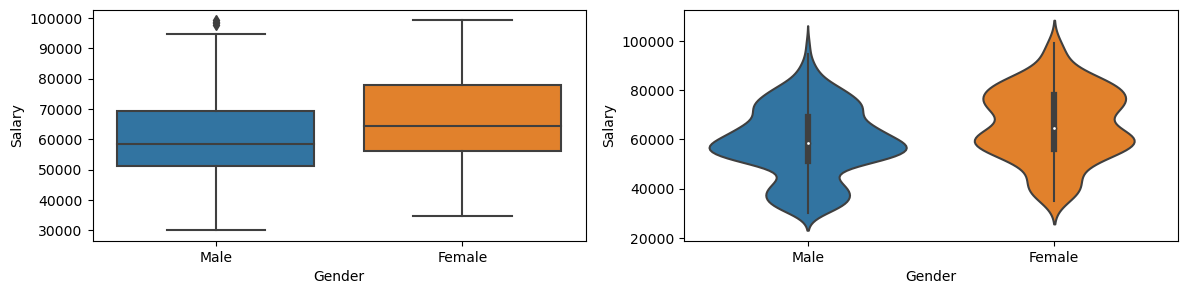

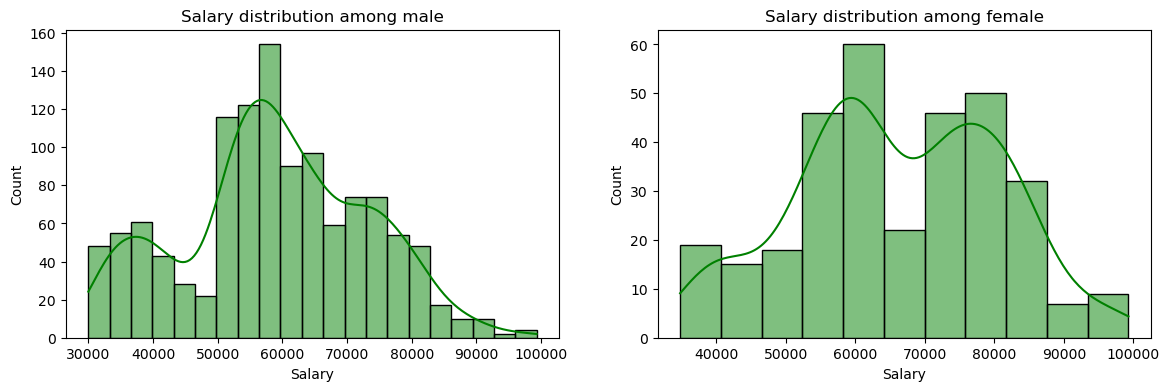

In [52]:
# salary distribution among male and female
plt.figure(figsize=(14,3))
plt.subplot(121)
sns.boxplot(data=df,x='Gender',y='Salary')
plt.subplot(122)
sns.violinplot(data=df,x='Gender',y='Salary')
plt.show()

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Salary distribution among male')
sns.histplot(data=df.loc[df['Gender']=='Male',['Salary']],x='Salary',kde=True,color='g')
plt.subplot(122)
plt.title('Salary distribution among female')
sns.histplot(data=df.loc[df['Gender']=='Female',['Salary']],x='Salary',kde=True,color='g')
# plt.savefig('salary_gender_dist.png',dpi=400)
plt.show()

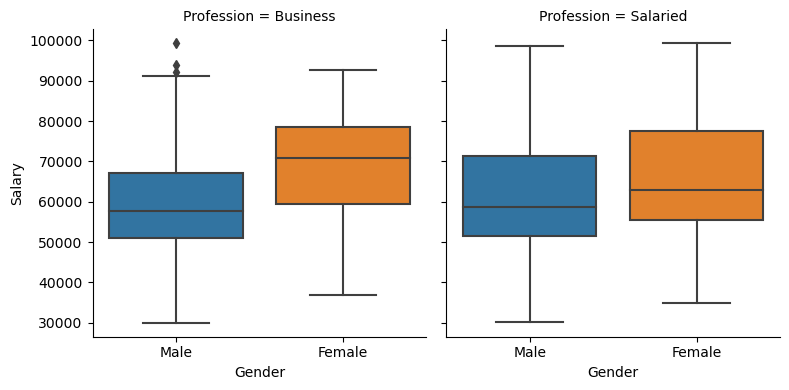

In [53]:
# salary distribution across gender and profession
sns.catplot(data=df,x='Gender',y='Salary',col='Profession',kind='box',height=4)
plt.show()

<b>Purchase price among buyers who have loans</b>

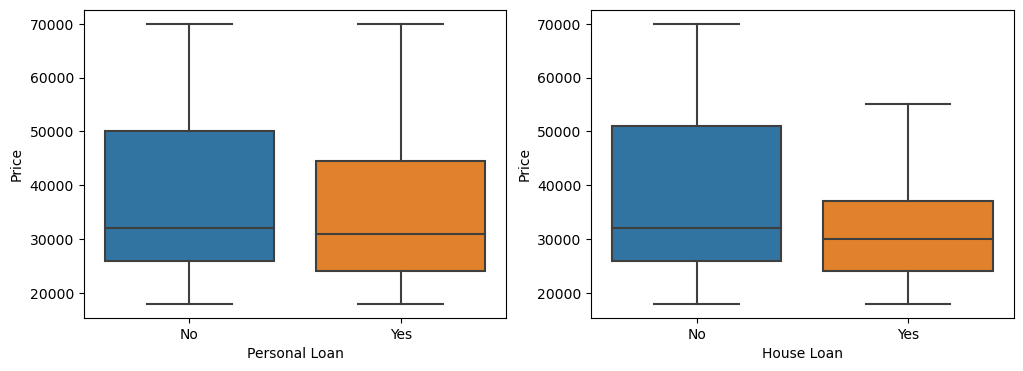

In [58]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.boxplot(data=df,x='Personal_loan',y='Price')
plt.xlabel('Personal Loan')
plt.subplot(122)
sns.boxplot(data=df,x='House_loan',y='Price')
plt.xlabel('House Loan')
# plt.savefig('buyers_with_loan.png',dpi=400)
plt.show()

<b>lets check the preference of vehicle make type with respect to number of dependents that a buyer has</b>

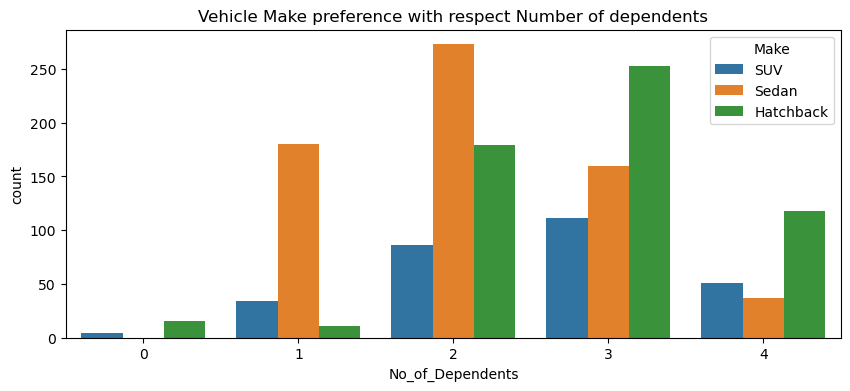

In [55]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='No_of_Dependents',hue='Make')
plt.title('Vehicle Make preference with respect Number of dependents')
plt.show()

<ul>
    <li>Since there are very less number of buyers with no dependents, it is difficult to state their preference with confidence.</li>
    <li>Among buyers with 1 or 2 dependents Sedan is most prefered.</li>
    <li>As number of dependents increase to 3 and 4 SUVs and hatchbacks become more desirable to buyers.</li>
</ul>